In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
# Load the cleaned DataFrame
df_jobs_cleaned = pd.read_csv("df_jobs_cleaned.csv")

In [22]:
# Select quantitative columns and labels
quantitative_columns = ['SalaryMin', 'SalaryMax', 'VacancyDuration']
label_column = 'DisabilityMention'

In [23]:
df_quantitative = df_jobs_cleaned[quantitative_columns].dropna()
labels = df_jobs_cleaned[label_column]

In [24]:
# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_quantitative)

In [25]:
# Perform PCA to reduce to 3 dimensions
pca_3 = PCA(n_components=3)
df_pca_3 = pca_3.fit_transform(df_standardized)

In [26]:
# Print the explained variance ratio for n_components=3
explained_variance_3 = pca_3.explained_variance_ratio_
cumulative_variance_3 = explained_variance_3.sum()
print(f"Explained variance ratio for 3 components: {explained_variance_3}")
print(f"Cumulative explained variance for 3 components: {cumulative_variance_3 * 100:.2f}%")

Explained variance ratio for 3 components: [0.58616317 0.33976968 0.07406715]
Cumulative explained variance for 3 components: 100.00%


In [27]:
# Save the prepared data for clustering
pca_cluster_output_filename = "df_jobs_pca_3d.csv"
pd.DataFrame(df_pca_3, columns=['PC1', 'PC2', 'PC3']).to_csv(pca_cluster_output_filename, index=False)
print(f"PCA-reduced DataFrame for clustering saved as {pca_cluster_output_filename}")

PCA-reduced DataFrame for clustering saved as df_jobs_pca_3d.csv


In [28]:
# KMeans Clustering with Silhouette Method
silhouette_scores = []
k_values = [2, 3, 4, 5, 6]

In [29]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_3)
    score = silhouette_score(df_pca_3, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.2f}")

Silhouette Score for k=2: 0.45
Silhouette Score for k=3: 0.56
Silhouette Score for k=4: 0.58
Silhouette Score for k=5: 0.62
Silhouette Score for k=6: 0.64


In [30]:
# Choose three smart values of k for visualization
best_k_values = sorted(zip(k_values, silhouette_scores), key=lambda x: x[1], reverse=True)[:3]

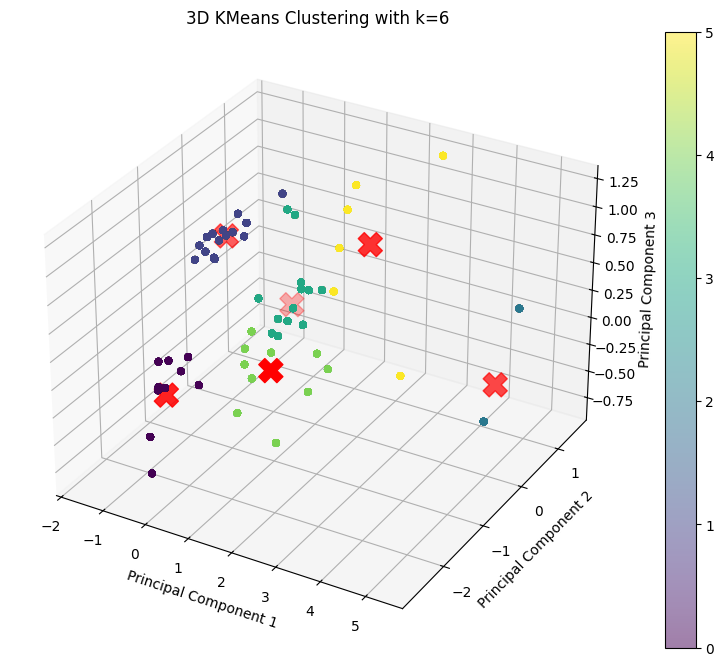

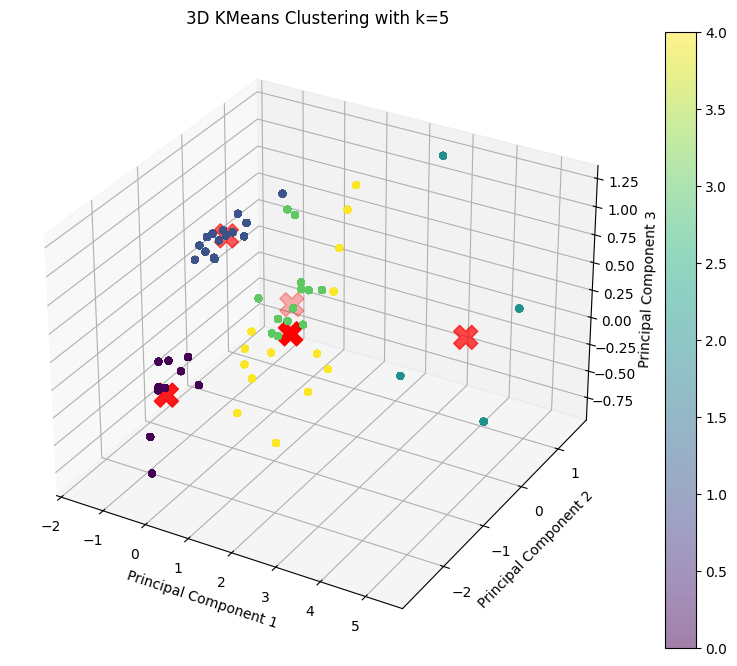

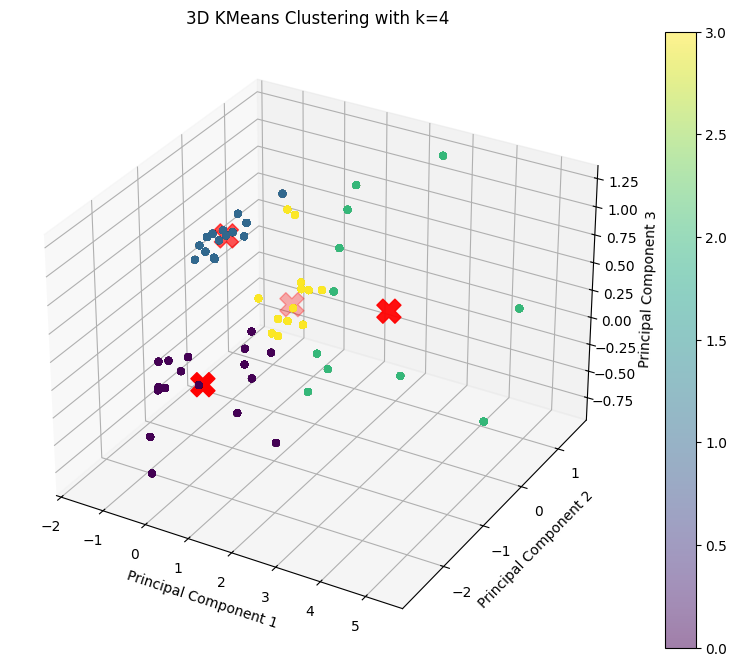

In [31]:
for k, _ in best_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_3)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Visualize the 3D clustering results with centroids
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(df_pca_3[:, 0], df_pca_3[:, 1], df_pca_3[:, 2], c=clusters, alpha=0.5, cmap='viridis')
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', marker='X')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title(f'3D KMeans Clustering with k={k}')
    plt.colorbar(sc)
    plt.savefig(f"kmeans_3d_clustering_k{k}.png")
    plt.show()

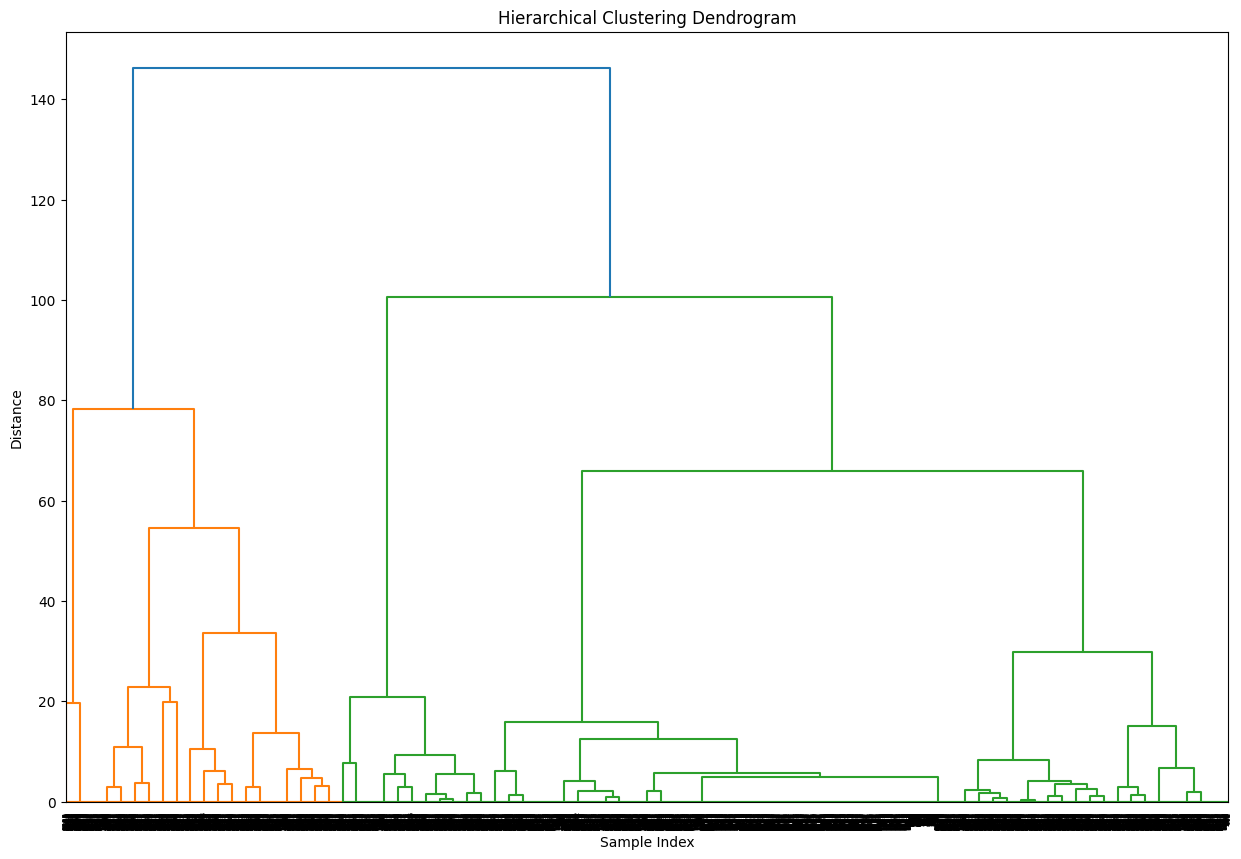

In [32]:
# Hierarchical Clustering
linkage_matrix = linkage(df_pca_3, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.savefig("hierarchical_dendrogram.png")
plt.show()

In [33]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_pca_3)
dbscan_labels = dbscan.labels_

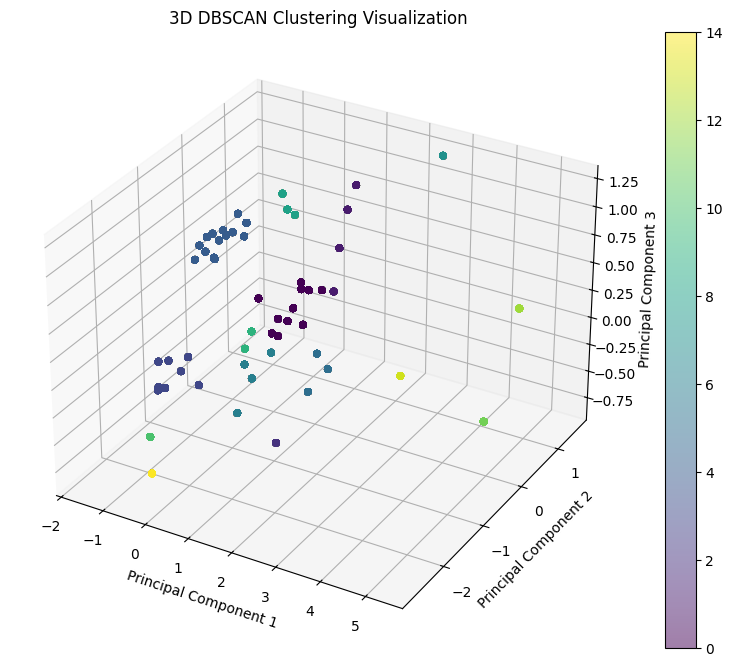

In [34]:
# Visualize the DBSCAN clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_pca_3[:, 0], df_pca_3[:, 1], df_pca_3[:, 2], c=dbscan_labels, alpha=0.5, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D DBSCAN Clustering Visualization')
plt.colorbar(sc)
plt.savefig("dbscan_3d_clustering.png")
plt.show()